In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.fft
from IPython.display import Audio

## ¿Que es un filtro?

un filtro es simplemente un sistema que modifica a una secuencia de entrada $x[n]$ para obtener una salida $y[n]$ entre otras representaciónes es común representar sistemas mediante ecuaciones en diferecias a coeficientes constantes:

$$\sum^{N}_{k=0}a_k y(n-k)=\sum^{M}_{k=0}b_k x[n-k]$$

podemos reordenar quitando el elemento 0 del primer sumatorio y obtener:

$$y(n-0)+\sum^{N}_{k=1}a_k y(n-k)=\sum^{M}_{k=0}b_k x[n-k]$$

para quedarnos con una forma mas general:

$$y(n)=-\sum^{N}_{k=1}a_k y(n-k) +\sum^{M}_{k=0}b_k x[n-k]$$

la funcion expresa la salida en terminos de las condiciones pasadas de la salida y la entrada.
### Preguntas:
que pasará si nuestra ecuacion en diferencias tiene M=2
$$y[n]= b_0 x[n] + b_1 x[n-1] + b_2 x[n-2]$$

y si M=1 y N=1

$$y[n]=-a_k y[n-1] + b_0 x[n] + b_1 x[n-1] $$

**desarrollen M=2 N=2**


veamos que el ultimo valor no es nulo!: ultimo valor -0.00390625


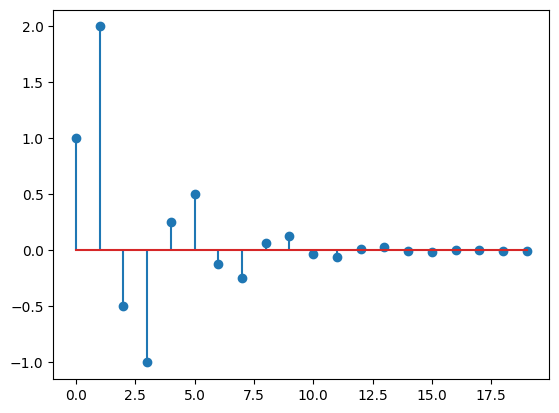

In [2]:
#implementemos M=1 N=1 y calcmos us respuesta al impulso: h[n]
x=np.zeros(20)
x[0]=1
y=[0] # cuiado que aqui agrego una condicion incial esta debiera de quitarla o considerar que el vector empieza en n=-1
h=[]
for n in range(len(x)):
    out= -0.5*y[n-1]+x[n]+2*x[n-1]
    y.append(out)
    h.append(out)
    

print("veamos que el ultimo valor no es nulo!: ultimo valor",h[-1])
plt.stem(h)
plt.show()


veamos que el ultimo valor no es nulo!: ultimo valor 0.0


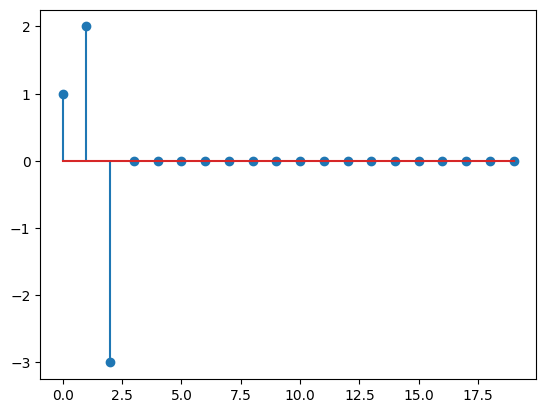

In [3]:
#implementemos M=0 N=2 y calcmos us respuesta al impulso: h[n]
x=np.zeros(20)
x[0]=1
y=[] # ahora no necesito las muestras inciales
h=[]
for n in range(len(x)):
    out=+x[n]+2*x[n-1]-3*x[n-2]
    y.append(out)
    h.append(out)

print("veamos que el ultimo valor no es nulo!: ultimo valor",y[-1])
plt.stem(y)
plt.show()

#### esto ultimo que vimos es una diferenciacion importante entre filtros, basados en su respuesta al impulso.

**En el primer caso econtramos un filtro de respuesta Infitinta al Impulso (Infinite Impulse Response) IIR**

**En el segundo caso encontramos un filtro de respuesta finita al Impulso (Finite Impulse Response) FIR**

**Empezaremos estudiando los filtros FIR**

 ## Filtros FIR
$$\require{cancel}$$  
$$y(n)=\cancelto{0}{-\sum^{N}_{k=1}a_k y(n-k)}  +\sum^{M}_{k=0}b_k x[n-k]$$

$$y(n)=\sum^{M}_{k=0}b_k x[n-k]$$

* Diseño con fase lineal
* No recursivos los coeficientes $a_k$ de su ecuación en diferencias son 0 (No dependen de valores previos de las salida)
* Siempre son estables (no tienen retroalimentación, si la entrada se vuelve "0" eventualmente la salida irá a 0.
* Faciles de implementar (Convolución, cálculo directo)
* La respuesta al impulso coincide con el vector de coeficientes $b_k$
 
 
 otra representacion conveniente:
 $$y[n]= b_0 x(n) + b_1 x(n-1) + b_2 x(n-2) + ... + b_n x(n-M+1)$$
 
 y esto reescribirlo de manera tal que ahora nuestra letra N responda a la longitud de nuestro filtro:
 
 $$y(n)=\sum^{N-1}_{k=0}b_k x[n-k]$$
 
<div>
<img src="filtro_fir.jpg" width="600"/>
</div>

ahora si miramos un poco la formula y consideramos se trata de un sistema LTI podriamos encontrar cierto parecido...

**filtro FIR**
$$y(n)=\sum^{M}_{k=0}b_k x[n-k]$$

**convolucion**
$$y(n)=\sum^{\infty}_{k=-\infty}h[k] x[n-k]$$

las principales diferencias la encontramos en los limites del sumatorio pero...

si consideramos:

\begin{align}
h(k)= \begin{cases} 0 & k<0 \\
h(k) & 0\leq k \leq N  \\
0 & k\geq N
\end{cases}
\end{align}


$$y(n)=\sum^{N-1}_{k=0}h[k] x[n-k]$$


## La conclusion importante aqui es indentificar que siendo que $h[k]$ es un vector que tiene $h_k = b_k$ por tanto en un filtro FIR los coeficientes coinsiden con su respuesta al impulso!

**Intepretación como media movil (MA)**

El sistema FIR es equivalente a una media movil ponderada que se aplica sobre la entrada, donde los coeficientes del sistema son los ponderadores 

Por ejemplo sea un sistema de 3 coeficientes $h[0]=a$, $h[1]=b$ y $h[2]=c$

$$
\begin{align}
y[n] = (h*x)[n] &= \sum_{j=0}^{2} h[j] x[n-j] \nonumber \\
&= a x[n] + b x[n-1] + c x[n-2] \nonumber
\end{align}
$$

donde cada salida se calcula a partir de 

$$
\overbrace{x[0], x[1], x[2]}^{y[2]} , x[3], x[4], \ldots
$$
$$
x[0], \overbrace{x[1], x[2] , x[3]}^{y[3]}, x[4], \ldots
$$
$$
x[0], x[1], \overbrace{x[2] , x[3], x[4]}^{y[4]}, \ldots
$$

Un detalle es que para obtener el valor de $y[0]$ e $y[1]$ se deben establecer "condiciones de borde", como por ejemplo $x[-2] = x[-1]= 0$

A continuación veremos algunos ejemplos de aplicaciones usando filtros FIR sencillos

In [13]:
# este codigo instala holoviews para las graficas interactivas puede demorar la ejecucion:
!pip install holoviews;


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
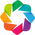

In [4]:
import holoviews as hv
hv.extension('bokeh')
hv.opts.defaults(hv.opts.Curve(width=500), 
                 hv.opts.Image(width=500, colorbar=True, cmap='Viridis'))

### Eliminando ruido blanco aditivo

En ciertos problemas la señal que observamos $x[n]$ no es exactamente la señal que deseamos $s[n]$, sino una versión corrupta de la misma. 

Un ejemplo muy típico es cuando la señal que deseamos estudiar debe ser transmitida desde su lugar de origen hasta nosotros. El canal suele agregar ruido a la señal y adicionalmente el ruido aumenta mientras más largo sea el recorrido de nuestra señal.

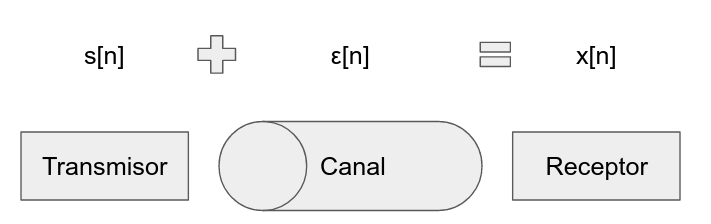

Un tipo particular de corrupción es el siguiente

$$
x[n] = s[n] + \epsilon[n], \quad \epsilon[n] \sim \mathcal{N}(0,\sigma^2)
$$

es decir una corrupción con ruido blanco aditivo y gaussiano, muy común en las transmisiones satelitales y espaciales

Consideremos a modo de ejemplo la siguiente señal observada que fue contaminada por ruido blanco aditivo:

In [5]:
np.random.seed(0)
n = np.arange(0, 200, step=1)
C = 5*np.exp(-0.5*(n[:, np.newaxis] - n[:, np.newaxis].T)**2/10**2)
# Señal limpia (lo que no conocemos)
s = np.random.multivariate_normal(np.zeros_like(n), C)/8
# Datos: Señal + ruido (lo que medimos)
x = s + np.random.randn(len(n))/4

p2 = hv.Curve((n, s), 'Tiempo', 'Señal', label='Deseada (s)').opts(color='k')
p1 = hv.Scatter((n, x), 'Tiempo', 'Señal', label='Observada (x)').opts(width=500, height=250)
hv.Overlay([p1, p2]).opts(legend_position='top')

:Overlay
   .Scatter.Observada_left_parenthesis_x_right_parenthesis :Scatter   [Tiempo]   (Señal)
   .Curve.Deseada_left_parenthesis_s_right_parenthesis     :Curve   [Tiempo]   (Señal)

Podemos usar un sistema FIR de tipo promediador para “suavizar la contaminación” e intentar recuperar la señal deseada

Sea un sistema FIR con L
 coeficientes idénticos e iguales a 1/L

In [6]:
h

[1.0,
 2.0,
 -3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [7]:
L = 10 
h = np.ones(L)/L
y = scipy.signal.convolve(x, h, mode='same', method='auto')

In [8]:
hMap1 = hv.HoloMap(kdims='Instante')
hMap2 = hv.HoloMap(kdims='Instante')

for m in range(0, len(n)-L, 5): 
    c = np.zeros_like(n, dtype=np.float64); 
    c[m:m+L] = h
    hMap1[m] = hv.Curve((n, c), 'Tiempo', 'Entrada', label='h').opts(color='r')
    hMap2[m] = hv.Curve((n[:m], y[:m]), 'Tiempo', 'Salida', label='y')
    
p_obs = hv.Scatter((n, x), 'Tiempo', 'Entrada', label='x')
p_clean = hv.Curve((n, s), 'Tiempo', 'Salida', label='s').opts(color='k', height=200)
(hMap1 * p_obs + hMap2 * p_clean).cols(1).opts(hv.opts.Curve(height=200), 
                                               hv.opts.Overlay(legend_position='top_left'))

:Layout
   .HoloMap.I  :HoloMap   [Instante]
      :Overlay
         .Curve.H   :Curve   [Tiempo]   (Entrada)
         .Scatter.X :Scatter   [Tiempo]   (Entrada)
   .HoloMap.II :HoloMap   [Instante]
      :Overlay
         .Curve.Y :Curve   [Tiempo]   (Salida)
         .Curve.S :Curve   [Tiempo]   (Salida)

Este filtro promedia los datos vecinos resultando una versión suavizada de los mismos. Esta versión suavizada se aproxima a la “señal limpia” que está escondida en el ruido.

En general, mientras más “largo” sea el filtro mayor será el efecto de suavizado

### Encontrar cambioes en una señal escalonada

In [9]:
n = np.arange(0, 100, step=1)
x = np.zeros_like(n, dtype=np.float64)
x[20:] += 1.
x[40:] += 1.
x[80:] -= 1.

hv.Curve((n, x), 'Tiempo', 'x').opts(width=500, height=200)

:Curve   [Tiempo]   (x)

Si nos interesa encontrar cambios en la señal podemos usar un sistema de tipo diferenciador

$$
y[n] = (h * x)[n] = \frac{1}{2}x[n] - \frac{1}{2} x[n-1]
$$

In [10]:
h = np.array([0.5, -0.5])
y = scipy.signal.convolve(x, h, mode='same', method='auto')

In [11]:
hMap1 = hv.HoloMap(kdims='Instante')
hMap2 = hv.HoloMap(kdims='Instante')

for m in range(0, len(n)-len(h), 5): 
    c = np.zeros_like(n, dtype=np.float64); 
    c[m:m+len(h)] = h
    hMap1[m] = hv.Curve((n, c), 'Tiempo', label='h')
    hMap2[m] = hv.Curve((n[:m+1], y[:m+1]), 'Tiempo', 'Salida')    

p_obs = hv.Curve((n, x), 'Tiempo', 'Entrada', label='x')
(p_obs * hMap1 + hMap2).cols(1).opts(hv.opts.Curve(height=200), 
                                     hv.opts.Overlay(legend_position='top_left'))

:Layout
   .HoloMap.I  :HoloMap   [Instante]
      :Overlay
         .Curve.X :Curve   [Tiempo]   (Entrada)
         .Curve.H :Curve   [Tiempo]   (y)
   .HoloMap.II :HoloMap   [Instante]
      :Curve   [Tiempo]   (Salida)

### Remover tendencias

En ciertas situaciones la señal que nos interesa (señal deseada) puede aparecer combinada con otras señales (interferencia)

In [14]:
np.random.seed(0); 
n = np.arange(0, 150, step=1)
C = np.exp(-0.5*(n[:, np.newaxis] - n[:, np.newaxis].T)**2/30**2)
x_tendencia = 3*np.random.multivariate_normal(np.zeros_like(n), C)+2.5
x_deseada = np.sin(2.0*np.pi*0.1*n) 
x = x_deseada + x_tendencia

p3=hv.Curve((n, x_deseada), 'Tiempo', 'Señal', label='Deseada (s)').opts(color='k', alpha=0.75)
p2=hv.Curve((n, x_tendencia), 'Tiempo', 'Señal', label='Tendencia').opts(alpha=0.75)
p1=hv.Curve((n, x), 'Tiempo', 'Señal', label='Observada (x)').opts(height=250)
hv.Overlay([p1,p2,p3]).opts(legend_position='bottom_right')

:Overlay
   .Curve.Observada_left_parenthesis_x_right_parenthesis :Curve   [Tiempo]   (Señal)
   .Curve.Tendencia                                      :Curve   [Tiempo]   (Señal)
   .Curve.Deseada_left_parenthesis_s_right_parenthesis   :Curve   [Tiempo]   (Señal)

Supongamos que nuestro sensor retorna la señal observada (azul) pero que lo que en realidad necesitamos es la señal deseada (negra)

El filtro que se muestra a continuación es capaz de separar la señal deseada (negro) de la tendencia (rojo) a partir de la señal observada (azul). En próximas lecciones veremos como diseñar este tipo de filtros

In [15]:
h = np.array([ 0.00099858,  0.00172998,  0.00288273,  0.00437671,  0.00567733,  0.00580422, 
              0.00350188, -0.00245489, -0.01289227, -0.02790429, -0.04665419, -0.06738128,
              -0.08763411, -0.10469179, -0.11608356,  0.88063544, -0.11608356, -0.10469179,
              -0.08763411, -0.06738128, -0.04665419, -0.02790429, -0.01289227, -0.00245489,
              0.00350188,  0.00580422,  0.00567733,  0.00437671,  0.00288273,  0.00172998,
              0.00099858])

hv.Curve((h), 'Tiempo', 'Filtro (h)').opts(height=200)

:Curve   [Tiempo]   (Filtro (h))

In [16]:
y = scipy.signal.convolve(x, h, mode='same', method='auto')

In [17]:
hMap1 = hv.HoloMap(kdims='Instante')
hMap2 = hv.HoloMap(kdims='Instante')

for m in range(0, len(n)-len(h), 5): 
    c = np.zeros_like(n, dtype=np.float64); 
    c[m:m+len(h)] = h
    hMap1[m] = hv.Curve((n, c), 'Tiempo', 'Entrada', label='h')    
    hMap2[m] = hv.Curve((n[:m], y[:m]), 'Tiempo', 'Salida', label='y').opts(ylim=(-1.2, 1.2))

p_obs = hv.Curve((n, x), 'Tiempo', 'Señal', label='x')
p_target = hv.Curve((n, x_deseada), 'Tiempo', 'Señal', label='s').opts(color='gray', alpha=0.5, width=4)    
(p_obs * hMap1 + hMap2 *p_target).cols(1).opts(hv.opts.Curve(height=200))

:Layout
   .HoloMap.I  :HoloMap   [Instante]
      :Overlay
         .Curve.X :Curve   [Tiempo]   (Señal)
         .Curve.H :Curve   [Tiempo]   (Entrada)
   .HoloMap.II :HoloMap   [Instante]
      :Overlay
         .Curve.Y :Curve   [Tiempo]   (Salida)
         .Curve.S :Curve   [Tiempo]   (Señal)

Podemos convolucionar una señal en Python usando 

```python
scipy.signal.convolve(in1, # Señal de entrada
                      in2, # Coeficientes del sistema
                      mode='full', 
                      method='auto'  
                     )
```

donde el argumento `method` puede ser

- `direct`: Realiza la convolución en el dominio del tiempo
- `fft`: Realiza la convolución multiplicando los espectros
- `auto`: Se decide automaticamente en base al largo de las señales


y el argumento `mode` indica donde se hace la convolución

Para ejemplificar la influencia de este argumento consideremos una señal $x=[a,b,c]$ y un sistema $h=[d, e]$ 

- Si uso `mode=valid` el resultado será $y=[ad+be, bd+ce]$
- Si uso `mode=same` el resultado será $y=[ae, ad+be, bd+ce]$, es decir se agregan ceros al principio de $x$ tal que $y$ sea del mismo largo que $x$
- Si uso `mode=full` el resultado será $y=[ae, ad+be, bd+ce, cd]$, es decir se agregan ceros al principio y al final de $x$ 

## Filtros pasabajos metodo de la ventana:

<div>
<img src="Filtro_diagrama.jpg" width="650"/>
</div>


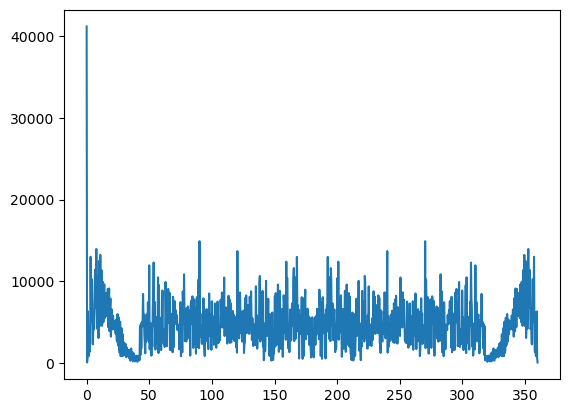

In [12]:
data=np.loadtxt("necg.txt")
fs=360
freq=np.linspace(0,fs,len(data))
X=np.fft.fft(data)
plt.plot(freq,np.abs(X))

np.ones()
plt.show()

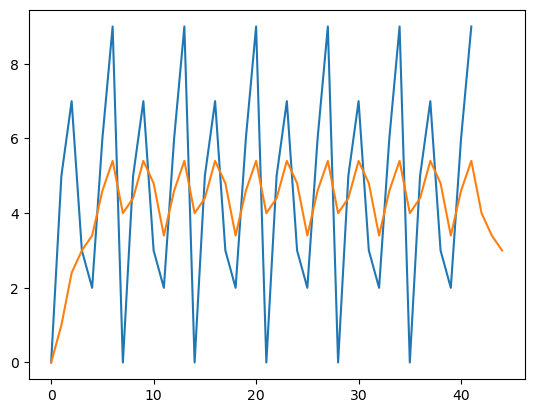

In [36]:
a=[0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9]
b=np.array([1,1,1,1,1])/5
c=np.convolve(a,b)
plt.plot(a)
plt.plot(c[:-1])
plt.show()

### El filtro FIR que utilizado previamente corresponde con un filtro de media movil, investigue en que ambitos se emplea el mismo y describa su ecuación en diferencias.

### calcule su respuesta al impulso:

### calcule la respusta en frecuencia calculando la TDF de la respuesta al impulso: